In [1]:
import pandas as pd
import numpy as np
#from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel('Height-Weight Data.xlsx')

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Height-Weight Scatter Graph')

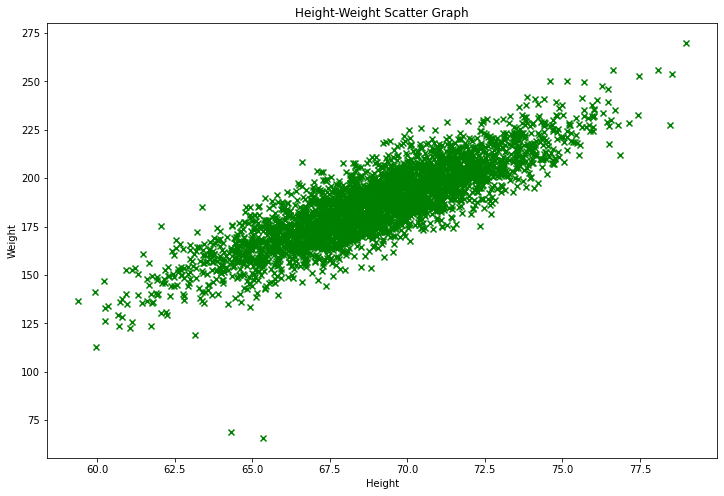

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,color='green',marker='x')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight Scatter Graph",color='Black')


In [15]:
x =df[['Height']]# single Dimention not Allowed
y=df[['Weight']]

In [16]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [17]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Split the dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split as tts

In [18]:
# train 70% ;test =30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [19]:
xtrain.head()

,Height
2919,70.358522
1660,68.068495
2574,73.181075
1276,70.343999
1023,73.721613


In [20]:
ytrain.head()

,Weight
2919,201.601812
1660,171.056290
2574,223.397572
1276,177.473282
1023,210.223501


# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
reg = LinearRegression()

In [23]:
reg

LinearRegression()

In [24]:
reg.fit(xtrain,ytrain)# traning

LinearRegression()

In [25]:
reg.coef_

array([[5.92301369]])

In [26]:
reg.intercept_


array([-222.08028455])

In [27]:
m=reg.coef_

In [28]:
c=reg.intercept_

In [29]:
x1=70
y=m*x1+c
y

array([[192.53067371]])

In [31]:
reg

LinearRegression()

In [33]:
reg.predict([[70]])

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192.53067371]])

In [34]:
pred = reg.predict(xtest)

In [35]:
pred

array([[174.30814752],
       [195.23333627],
       [178.74180574],
       ...,
       [197.78726905],
       [181.01278259],
       [176.24465612]])

In [36]:
df['predicted result'] = reg.predict(x)

In [37]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.316608
1,68.781904,162.310473,185.315875
2,74.110105,212.740856,216.874884
3,71.730978,220.042470,202.783282
4,69.881796,206.349801,191.830549


In [39]:
x1=74
y=m*x1+c
y

array([[216.22272847]])

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [41]:
mse = mean_squared_error(ytest,pred)

In [42]:
mse

100.21480732705156

In [43]:
mae = mean_absolute_error (ytest,pred)

In [44]:
mae

7.929635649303441

# Best fit Line

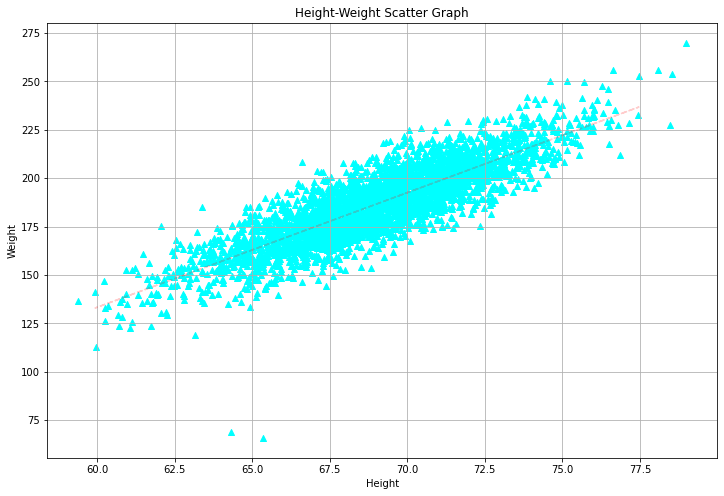

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,color='cyan',marker='^')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight Scatter Graph",color='Black')
plt.grid()
plt.plot(xtrain.squeeze() , reg.predict(xtrain),'r--',alpha=0.2)

In [51]:
reg.predict([[65]])

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[162.91560526]])

In [52]:
reg.score(xtest,ytest)

0.7510323849465408